

In this project, I will explore the practical implementation of machine learning algorithms using Scikit-learn. The project will cover:

- Implementing key machine learning algorithms
- Feature selection and dimensionality reduction techniques (PCA, LDA)
- Model tuning and optimization (Grid Search, Random Search)
- Handling imbalanced data

I will use the **Breast Cancer Dataset**, which contains numerical features derived from images of breast cancer tissue and a target indicating whether the tumor is malignant or benign.


## Setup and Import Libraries

First, I need to import the necessary libraries for data processing, model building, and evaluation.


In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn specific imports
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [3]:
# Load dataset
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target

In [4]:
cancer_data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


#### Dataset Overview



In [6]:
# Checking for missing values and data types
df.info()

# Statistical summary of numerical features
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### Target Variable Distribution




/tmp/ipython-input-73534938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set1')


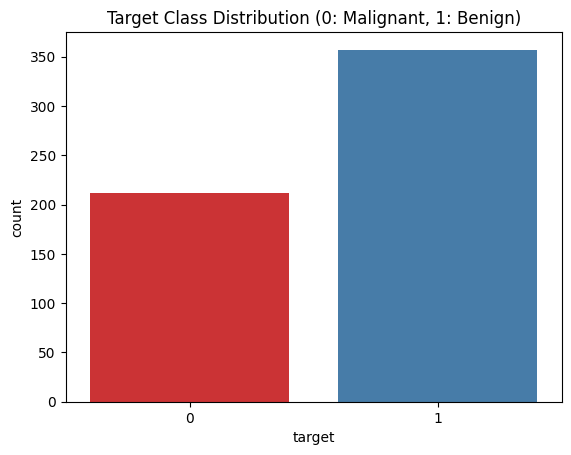

In [7]:
# Count of target classes
sns.countplot(x='target', data=df, palette='Set1')
plt.title('Target Class Distribution (0: Malignant, 1: Benign)')
plt.show()

#### Feature Distributions




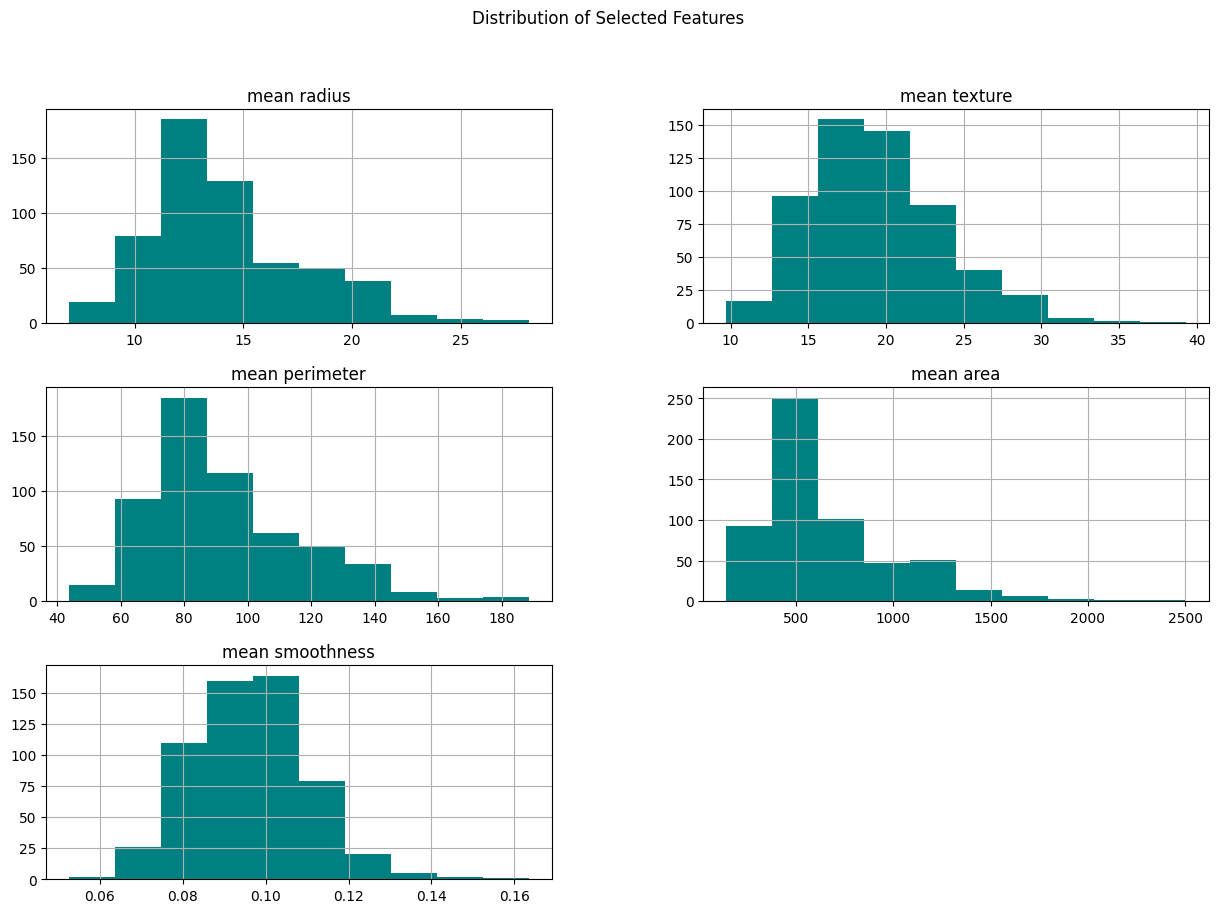

In [8]:
# Plot histograms for selected features
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']

df[features].hist(bins=10, figsize=(15, 10), color='teal')
plt.suptitle('Distribution of Selected Features')
plt.show()

#### Correlation Matrix




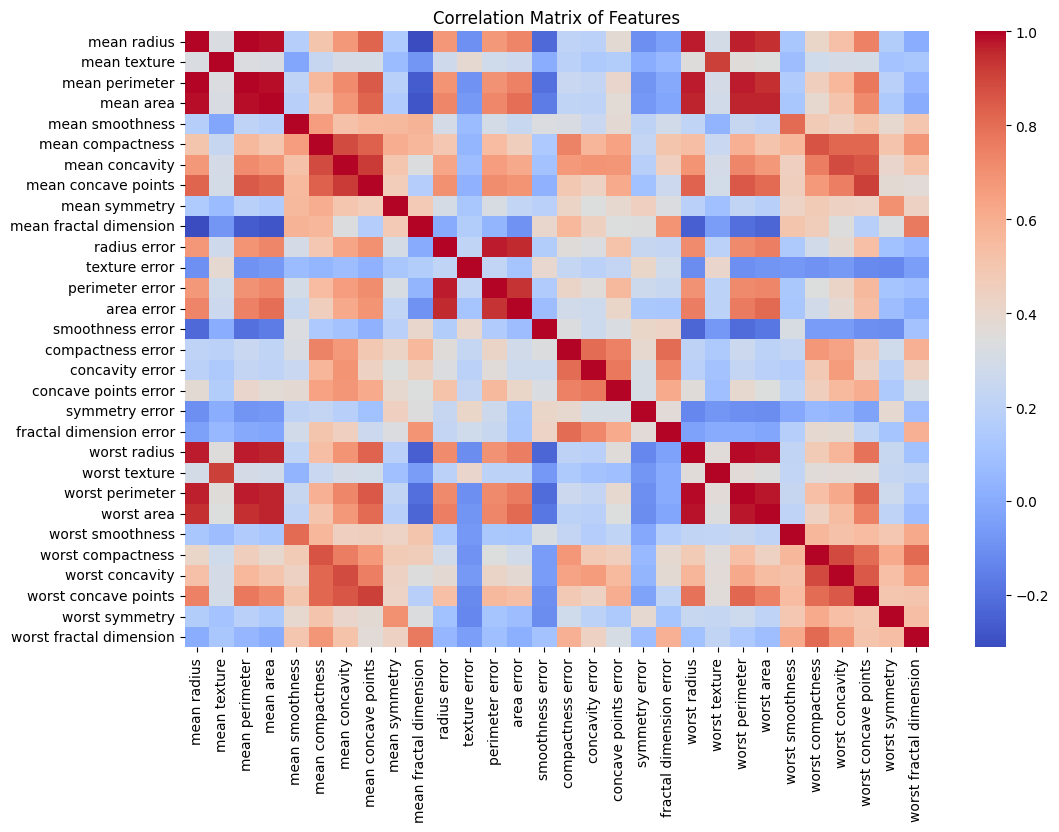

In [9]:
# Compute correlation matrix
corr_matrix = df.drop('target', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

#### Pair Plot of Selected Features



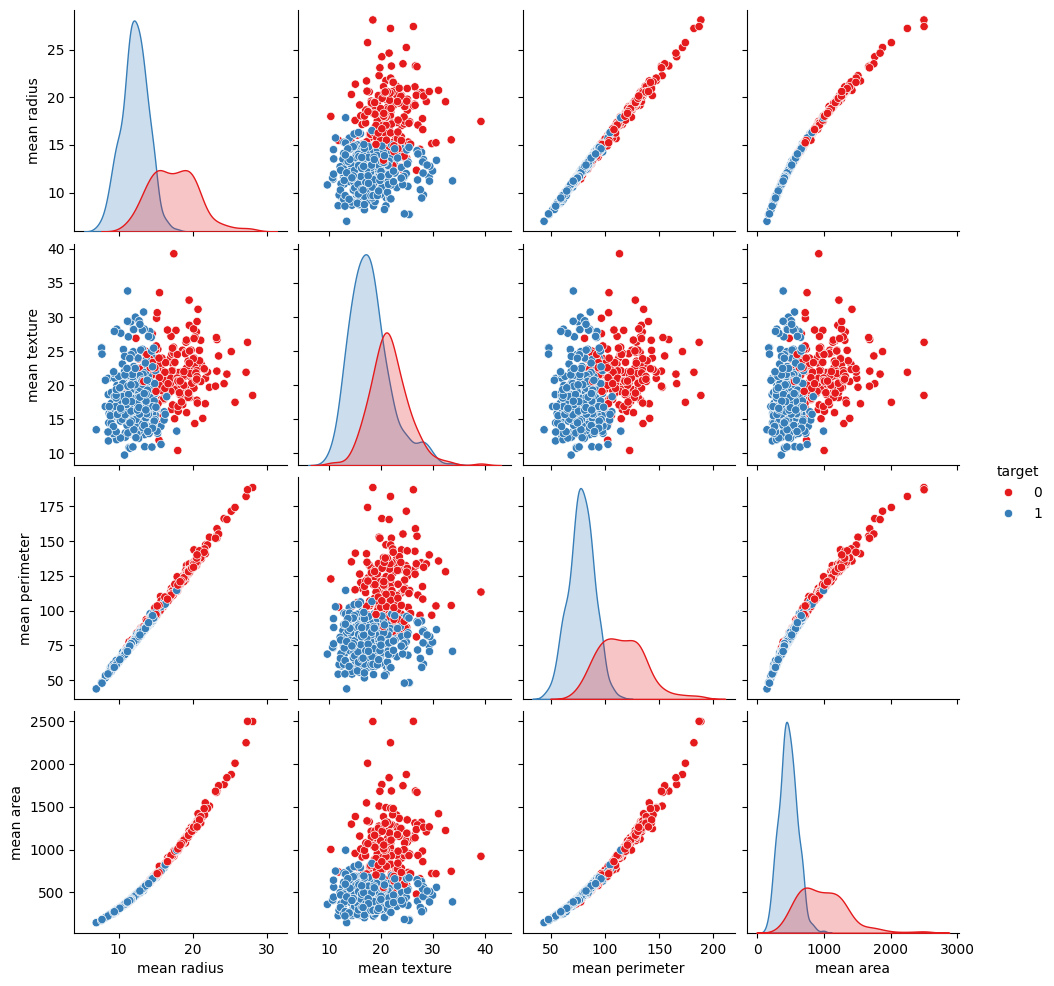

In [10]:
# Pair plot for selected features
sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'target']], hue='target', palette='Set1')
plt.show()

#### Boxplots to Explore Variability



/tmp/ipython-input-684566846.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='mean radius', data=df, palette='Set1')


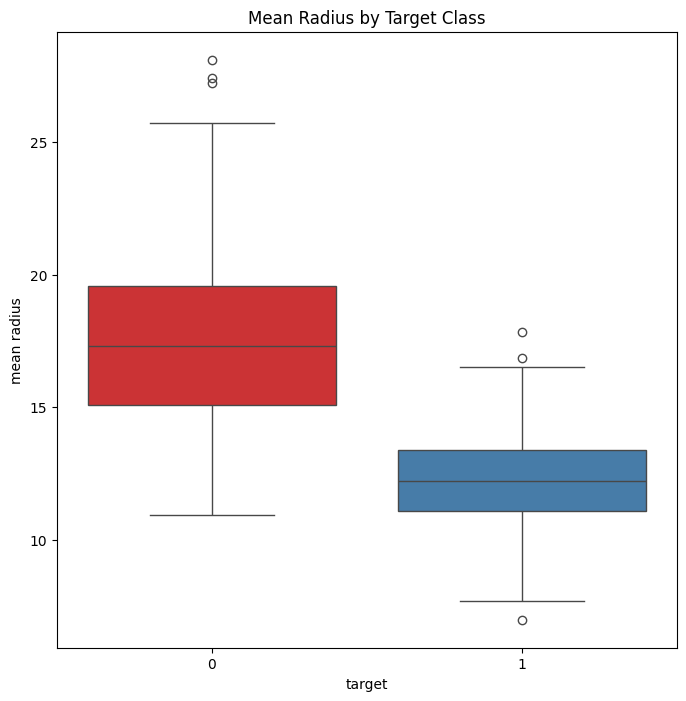

/tmp/ipython-input-684566846.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='mean texture', data=df, palette='Set1')


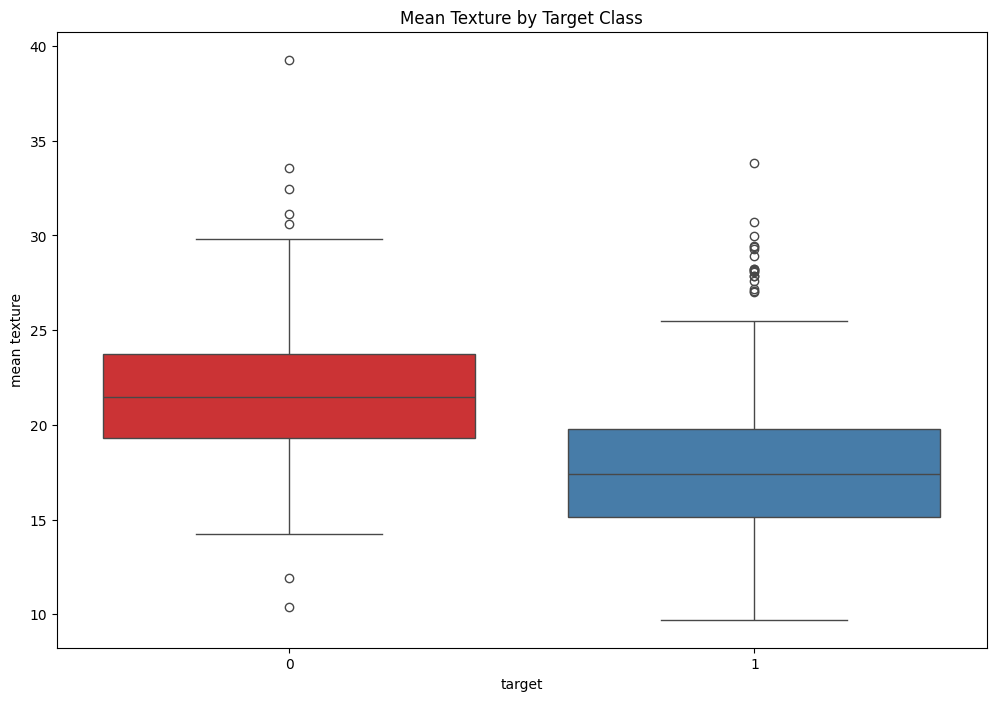

In [11]:
# Boxplot for feature variability across target classes
plt.figure(figsize=(8, 8))
sns.boxplot(x='target', y='mean radius', data=df, palette='Set1')
plt.title('Mean Radius by Target Class')
plt.show()

# Repeat for other features
plt.figure(figsize=(12, 8))
sns.boxplot(x='target', y='mean texture', data=df, palette='Set1')
plt.title('Mean Texture by Target Class')
plt.show()

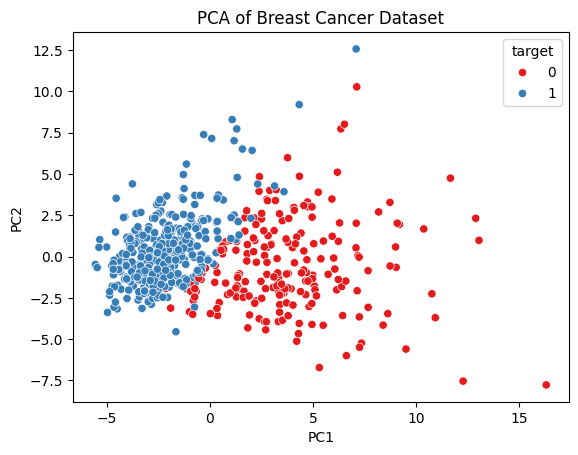

In [12]:
# Standardizing the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop('target', axis=1))

# Applying PCA to reduce dimensions
pca = PCA(n_components=2)  # Reducing to 2 principal components for visualization
pca_data = pca.fit_transform(scaled_data)

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['target'] = df['target']

# Visualize the first two principal components
sns.scatterplot(x='PC1', y='PC2', hue='target', data=pca_df, palette='Set1')
plt.title('PCA of Breast Cancer Dataset')
plt.show()

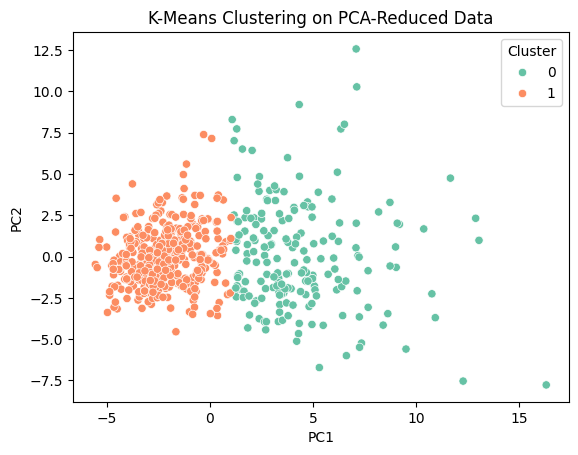

In [13]:
from sklearn.cluster import KMeans

# Perform K-Means clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=2, random_state=42)  # Assume 2 clusters
clusters = kmeans.fit_predict(pca_data)

# Add the cluster labels to the DataFrame
pca_df['Cluster'] = clusters

# Visualize the clusters
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2')
plt.title('K-Means Clustering on PCA-Reduced Data')
plt.show()


## Feature Selection and Dimensionality Reduction: Linear Discriminant Analysis (LDA)

**Linear Discriminant Analysis (LDA)** is another dimensionality reduction technique that focuses on maximizing the separation between multiple classes. It reduces dimensions by projecting data into a space that maximizes the distance between the means of the classes while minimizing the variation within each class.


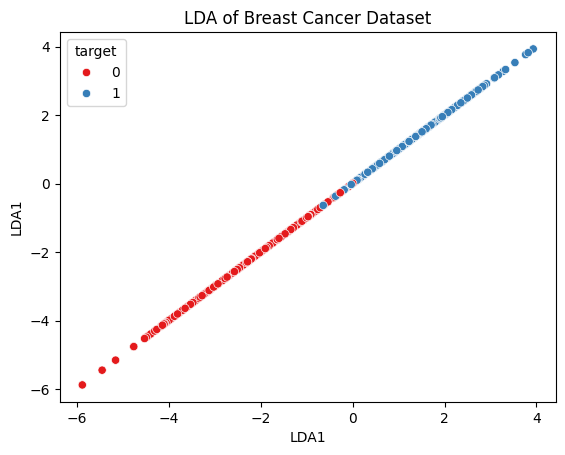

In [14]:
# Applying LDA
lda = LDA(n_components=1)  # LDA with 1 component
lda_data = lda.fit_transform(scaled_data, df['target'])

# Create a new DataFrame with the LDA result
lda_df = pd.DataFrame(lda_data, columns=['LDA1'])
lda_df['target'] = df['target']

# Visualize LDA
sns.scatterplot(x='LDA1', y='LDA1', hue='target', data=lda_df, palette='Set1')
plt.title('LDA of Breast Cancer Dataset')
plt.show()


## Implementing a Machine Learning Algorithm: Random Forest Classifier




In [15]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['target'], test_size=0.3, random_state=42)

# Implementing Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=1)
rf_model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Classifier Accuracy: {accuracy * 100:.2f}%")


Random Forest Classifier Accuracy: 95.91%


In [16]:
print("accuracy" , accuracy_score(y_test, y_pred))
print("precision" , precision_score(y_test, y_pred))
print("recall" , recall_score(y_test, y_pred))
print("f1 score" , f1_score(y_test, y_pred))

accuracy 0.9590643274853801
precision 0.954954954954955
recall 0.9814814814814815
f1 score 0.9680365296803652


In [17]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Confusion Matrix: \n{conf_matrix}")

Confusion Matrix: 
[[ 58   5]
 [  2 106]]


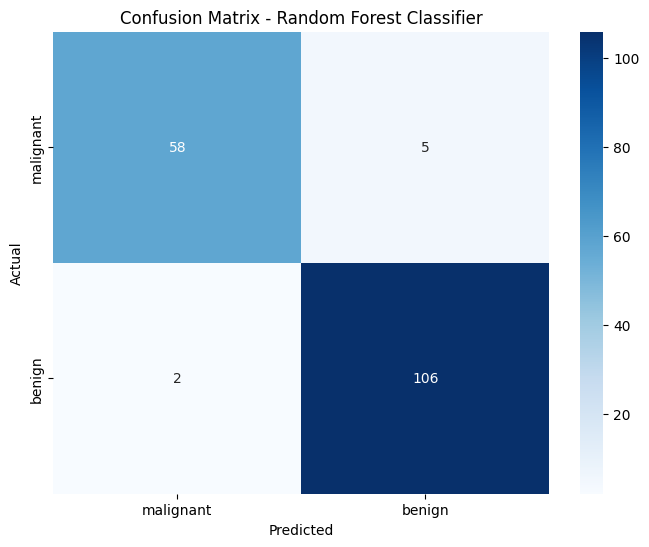

In [18]:
# Visualizing the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=cancer_data.target_names, yticklabels=cancer_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()
